<a href="https://colab.research.google.com/github/silvererudite/ML_algos_onSomeDatasets/blob/master/signal_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
plt.figure(figsize=(15,10))
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
from sklearn.datasets import make_multilabel_classification
import pickle

In [48]:
data=pd.read_csv("features_all.csv")

In [49]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,0.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,10.1,11.1,0.2,1.2,2.2,3.2,4.2,5.2,6.2,7.2,8.2,9.2,10.2,11.2,12.1,13.1,14.1,15.1,16.1,17.1,18.1,19.1,20.1,21.1,22.1,23.1,24.1,25.1,Valence,Arousal,Dominance,Likings
0,56.499274,64.436050,0.876827,11437.251030,1.140476,4.765292,293.950998,0.727273,0.719298,0.951220,0.615385,48.792271,48.772649,48.821751,54.385965,0.560036,0.439964,42.286397,37.480158,0.433864,0.566136,42.442975,48.482970,0.488712,0.511288,42.364758,43.332209,0.464253,2.014903,1765.0,1585.0,197.0,3338.209961,152.7,573.0,13.9,3337.068393,1668.534197,1724.0,19.7,138.8,23497.20658,402,4061,3461,1.111771e+07,28.088789,18.615108,5.345337,0.771306,4.610239,8.031870,37.130636,2.265080e+05,34353.06152,303,4103,1369,1.634150e+07,35.582928,28.291786,22.178263,3.511124,5.208256,5.404118,45.016397,2.869407e+05,1,1,1,1
1,38.494614,60.133732,0.640150,7272.236655,1.562134,4.568638,375.747709,0.704918,0.728814,1.000000,0.187500,49.565217,49.539509,49.588632,47.457627,0.439442,0.560558,25.518897,28.821846,0.593959,0.406041,46.344314,38.318015,0.549043,0.450957,37.409956,33.904049,0.437149,1.519826,921.0,450.0,194.0,2232.874914,60.8,302.0,35.2,2221.738415,1110.869207,802.0,19.4,25.6,19498.33897,65,4069,2147,1.273443e+07,35.652259,26.890440,18.460009,0.626466,3.901974,10.081427,39.738780,2.874998e+05,33070.59514,57,4062,77,3.146819e+08,183.147256,148.451553,100.986362,2.976626,6.191706,4.129102,197.542525,1.476899e+06,1,1,1,1
2,34.326195,97.560340,0.351846,10520.802030,2.842154,4.729019,1109.126111,0.691176,0.672414,1.000000,0.210526,48.942598,48.975740,48.914179,50.000000,0.429188,0.570812,22.491153,25.937885,0.519018,0.480982,70.285331,67.660861,0.509120,0.490880,52.181796,51.238491,0.334139,0.980829,3051.0,635.0,267.0,4475.143385,198.7,387.0,161.9,4459.726703,2229.863351,2254.0,26.7,36.8,20702.74300,168,4044,2238,1.527826e+07,35.346504,24.917630,19.742515,0.574915,4.545179,8.561064,43.527299,2.850342e+05,32713.50205,75,4063,276,1.333090e+08,114.491973,93.392981,79.627275,3.607022,4.860031,5.657168,128.574371,9.232633e+05,1,1,1,1
3,54.386290,51.999555,1.045899,8884.621601,0.956115,4.655609,198.870247,0.750000,0.767857,0.976744,0.416667,48.785425,48.838576,48.731062,55.357143,0.510135,0.489865,38.853157,38.073415,0.304591,0.695409,28.698425,43.363050,0.411994,0.588006,34.155288,40.804038,0.276105,1.558145,763.0,667.0,235.0,1390.800127,50.0,367.0,6.8,1388.201911,694.100956,735.0,23.5,43.2,22017.14682,128,3980,2728,1.292103e+09,265.383533,175.288366,-2.561121,1.790132,2.076415,22.743032,400.288654,2.140053e+06,35221.46617,341,4000,2810,4.560663e+07,54.005690,43.538431,32.518690,3.199306,5.735353,4.390926,75.203621,4.355019e+05,0,1,1,1
4,67.950109,73.492253,0.924589,15688.506310,1.081562,4.902552,317.945701,0.687500,0.700000,0.976190,0.222222,50.961538,50.880256,51.044690,43.333333,0.488062,0.511938,47.474949,48.622298,0.500697,0.499303,52.003096,51.930620,0.494874,0.505126,49.790525,50.303664,0.344003,1.791759,154.0,127.0,115.0,101.007542,-6.0,58.0,-7.2,83.137709,41.568854,55.0,11.5,1.2,24034.26809,243,4020,1965,9.636950e+06,28.738650,21.308054,13.828354,1.511439,2.835474,16.161550,34.569616,2.317485e+05,36339.21410,161,4082,240,6.029838e+08,223.518368,168.482448,70.074116,3.442979,5.179062,5.221266,273.449761,1.802452e+06,1,0,1,1


In [50]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,0.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,10.1,11.1,0.2,1.2,2.2,3.2,4.2,5.2,6.2,7.2,8.2,9.2,10.2,11.2,12.1,13.1,14.1,15.1,16.1,17.1,18.1,19.1,20.1,21.1,22.1,23.1,24.1,25.1,Valence,Arousal,Dominance,Likings
count,1280.000000,1280.000000,1280.000000,1.280000e+03,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.00000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,1280.000000,1280.000000,1280.000000,1280.000000,1.280000e+03,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1.280000e+03,1.280000e+03,1280.000000,1280.000000,1280.000000,1.280000e+03,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1.280000e+03,1280.000000,1280.000000,1280.000000,1280.000000
mean,161.013298,171.390118,0.862372,4.871379e+05,1.463456,5.218642,826.784017,0.624016,0.628330,0.869964,0.212702,50.679901,50.626913,50.709289,48.947109,0.506398,0.493602,116.037504,108.698617,0.519307,0.480693,123.228363,116.105317,0.511142,0.488858,121.046076,114.087299,0.530187,inf,777.044633,585.113709,134.569607,2279.744611,44.313390,317.12221,-0.741020,1993.170153,996.585076,577.703507,13.456961,45.054410,41770.126481,246.180469,3973.425000,2453.238281,4.945978e+08,114.056891,86.523804,45.301009,7.983670,9.999159,37.734343,136.448393,9.197548e+05,5.426604e+04,148.430469,4048.007812,2285.481250,3.548739e+09,236.918051,179.356454,95.728270,56.941626,5.384987,27.675723,283.943291,1.910507e+06,0.553125,0.575781,0.609375,0.664844
std,357.160715,359.083954,0.350817,6.805632e+06,0.840066,0.791423,1463.202022,0.082112,0.094507,0.106237,0.120148,3.456464,3.066653,3.899599,4.635587,0.098768,0.098768,282.659523,222.089590,0.108581,0.108581,277.920938,228.933814,0.069150,0.069150,279.715542,224.719728,0.144208,NaN,1357.950468,1095.865682,216.721826,6133.417145,99.891565,551.72826,45.041114,5984.011960,2992.005980,1064.987450,21.672183,102.482016,44191.816468,290.465727,159.804711,1870.950353,4.876149e+09,163.850525,126.749188,69.377179,89.067248,8.154483,364.314244,206.697418,1.321291e+06,1.112083e+05,192.965499,134.321717,1622.868152,7.809983e+10,398.556439,266.275909,157.492325,1348.442359,4.724186,252.772599,600.086170,3.213959e+06,0.497364,0.494417,0.488081,0.472230
min,9.700788,10.713260,0.178237,4.802812e+02,0.517134,3.388466,30.363813,0.302632,0.250000,0.235294,0.000000,20.155039,26.759609,13.676694,34.666667,0.006234,0.000012,6.932906,6.793956,0.015969,0.018276,5.903931,8.325049,0.011176,0.009384,6.596651,9.027487,0.003445,0.059571,2.000000,1.000000,0.000000,2.037350,-98.000000,0.00000,-423.600000,0.062500,0.031250,0.000000,0.000000,0.100000,13568.818680,1.000000,3424.000000,59.000000,8.079002e+05,8.208445,6.030365,-8.504984,0.135456,0.527943,0.125085,10.009298,6.619290e+04,1.953171e+04,1.000000,3448.000000,47.000000,4.935236e+06,18.307567,12.896702,-3001.760388,0.715906,0.529158,0.229237,24.738804,1.476322e+05,0.000000,0.000000,0.000000,0.000000
25%,35.056095,64.931407,0.551804,7.146250e+03,0.917191,4.561048,346.758189,0.578125,0.577465,0.833333,0.125000,49.424735,49.418959,49.316785,45.896818,0.458704,0.459616,24.664244,21.181825,0.451552,0.417979,46.062703,42.884734,0.483512,0.467983,38.519713,37.549770,0.446513,1.169802,64.000000,26.000000,0.000000,39.888761,0.500000,6.00000,0.000000,15.031222,7.515611,49.000000,0.000000,0.300000,21892.178300,72.000000,3898.000000,470.500000,1.978414e+07,39.794159,30.432750,15.099019,0.515281,4.145443,2.146908,49.531687,3.209001e+05,3.158962e+04,43.750000,3994.000000,627.500000,7.736988e+07,79.867882,60.002827,30.323755,2.356691,2.892265,4.140427,97.951318,6.440546e+05,0.0000

In [51]:
indexNames = data[ data['28'] == 'inf' ].index
data.drop(indexNames , inplace=True)
data.replace('', np.NaN, inplace=True) 
data.fillna(data.mean(), inplace = True)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,0.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,10.1,11.1,0.2,1.2,2.2,3.2,4.2,5.2,6.2,7.2,8.2,9.2,10.2,11.2,12.1,13.1,14.1,15.1,16.1,17.1,18.1,19.1,20.1,21.1,22.1,23.1,24.1,25.1,Valence,Arousal,Dominance,Likings
0,56.499274,64.436050,0.876827,11437.251030,1.140476,4.765292,293.950998,0.727273,0.719298,0.951220,0.615385,48.792271,48.772649,48.821751,54.385965,0.560036,0.439964,42.286397,37.480158,0.433864,0.566136,42.442975,48.482970,0.488712,0.511288,42.364758,43.332209,0.464253,2.014903,1765.0,1585.0,197.0,3338.209961,152.7,573.0,13.9,3337.068393,1668.534197,1724.0,19.7,138.8,23497.20658,402,4061,3461,1.111771e+07,28.088789,18.615108,5.345337,0.771306,4.610239,8.031870,37.130636,2.265080e+05,34353.06152,303,4103,1369,1.634150e+07,35.582928,28.291786,22.178263,3.511124,5.208256,5.404118,45.016397,2.869407e+05,1,1,1,1
1,38.494614,60.133732,0.640150,7272.236655,1.562134,4.568638,375.747709,0.704918,0.728814,1.000000,0.187500,49.565217,49.539509,49.588632,47.457627,0.439442,0.560558,25.518897,28.821846,0.593959,0.406041,46.344314,38.318015,0.549043,0.450957,37.409956,33.904049,0.437149,1.519826,921.0,450.0,194.0,2232.874914,60.8,302.0,35.2,2221.738415,1110.869207,802.0,19.4,25.6,19498.33897,65,4069,2147,1.273443e+07,35.652259,26.890440,18.460009,0.626466,3.901974,10.081427,39.738780,2.874998e+05,33070.59514,57,4062,77,3.146819e+08,183.147256,148.451553,100.986362,2.976626,6.191706,4.129102,197.542525,1.476899e+06,1,1,1,1
2,34.326195,97.560340,0.351846,10520.802030,2.842154,4.729019,1109.126111,0.691176,0.672414,1.000000,0.210526,48.942598,48.975740,48.914179,50.000000,0.429188,0.570812,22.491153,25.937885,0.519018,0.480982,70.285331,67.660861,0.509120,0.490880,52.181796,51.238491,0.334139,0.980829,3051.0,635.0,267.0,4475.143385,198.7,387.0,161.9,4459.726703,2229.863351,2254.0,26.7,36.8,20702.74300,168,4044,2238,1.527826e+07,35.346504,24.917630,19.742515,0.574915,4.545179,8.561064,43.527299,2.850342e+05,32713.50205,75,4063,276,1.333090e+08,114.491973,93.392981,79.627275,3.607022,4.860031,5.657168,128.574371,9.232633e+05,1,1,1,1
3,54.386290,51.999555,1.045899,8884.621601,0.956115,4.655609,198.870247,0.750000,0.767857,0.976744,0.416667,48.785425,48.838576,48.731062,55.357143,0.510135,0.489865,38.853157,38.073415,0.304591,0.695409,28.698425,43.363050,0.411994,0.588006,34.155288,40.804038,0.276105,1.558145,763.0,667.0,235.0,1390.800127,50.0,367.0,6.8,1388.201911,694.100956,735.0,23.5,43.2,22017.14682,128,3980,2728,1.292103e+09,265.383533,175.288366,-2.561121,1.790132,2.076415,22.743032,400.288654,2.140053e+06,35221.46617,341,4000,2810,4.560663e+07,54.005690,43.538431,32.518690,3.199306,5.735353,4.390926,75.203621,4.355019e+05,0,1,1,1
4,67.950109,73.492253,0.924589,15688.506310,1.081562,4.902552,317.945701,0.687500,0.700000,0.976190,0.222222,50.961538,50.880256,51.044690,43.333333,0.488062,0.511938,47.474949,48.622298,0.500697,0.499303,52.003096,51.930620,0.494874,0.505126,49.790525,50.303664,0.344003,1.791759,154.0,127.0,115.0,101.007542,-6.0,58.0,-7.2,83.137709,41.568854,55.0,11.5,1.2,24034.26809,243,4020,1965,9.636950e+06,28.738650,21.308054,13.828354,1.511439,2.835474,16.161550,34.569616,2.317485e+05,36339.21410,161,4082,240,6.029838e+08,223.518368,168.482448,70.074116,3.442979,5.179062,5.221266,273.449761,1.802452e+06,1,0,1,1


In [52]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,0.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,10.1,11.1,0.2,1.2,2.2,3.2,4.2,5.2,6.2,7.2,8.2,9.2,10.2,11.2,12.1,13.1,14.1,15.1,16.1,17.1,18.1,19.1,20.1,21.1,22.1,23.1,24.1,25.1,Valence,Arousal,Dominance,Likings
0,56.499274,64.436050,0.876827,11437.251030,1.140476,4.765292,293.950998,0.727273,0.719298,0.951220,0.615385,48.792271,48.772649,48.821751,54.385965,0.560036,0.439964,42.286397,37.480158,0.433864,0.566136,42.442975,48.482970,0.488712,0.511288,42.364758,43.332209,0.464253,2.014903,1765.0,1585.0,197.0,3338.209961,152.7,573.0,13.9,3337.068393,1668.534197,1724.0,19.7,138.8,23497.20658,402,4061,3461,1.111771e+07,28.088789,18.615108,5.345337,0.771306,4.610239,8.031870,37.130636,2.265080e+05,34353.06152,303,4103,1369,1.634150e+07,35.582928,28.291786,22.178263,3.511124,5.208256,5.404118,45.016397,2.869407e+05,1,1,1,1
1,38.494614,60.133732,0.640150,7272.236655,1.562134,4.568638,375.747709,0.704918,0.728814,1.000000,0.187500,49.565217,49.539509,49.588632,47.457627,0.439442,0.560558,25.518897,28.821846,0.593959,0.406041,46.344314,38.318015,0.549043,0.450957,37.409956,33.904049,0.437149,1.519826,921.0,450.0,194.0,2232.874914,60.8,302.0,35.2,2221.738415,1110.869207,802.0,19.4,25.6,19498.33897,65,4069,2147,1.273443e+07,35.652259,26.890440,18.460009,0.626466,3.901974,10.081427,39.738780,2.874998e+05,33070.59514,57,4062,77,3.146819e+08,183.147256,148.451553,100.986362,2.976626,6.191706,4.129102,197.542525,1.476899e+06,1,1,1,1
2,34.326195,97.560340,0.351846,10520.802030,2.842154,4.729019,1109.126111,0.691176,0.672414,1.000000,0.210526,48.942598,48.975740,48.914179,50.000000,0.429188,0.570812,22.491153,25.937885,0.519018,0.480982,70.285331,67.660861,0.509120,0.490880,52.181796,51.238491,0.334139,0.980829,3051.0,635.0,267.0,4475.143385,198.7,387.0,161.9,4459.726703,2229.863351,2254.0,26.7,36.8,20702.74300,168,4044,2238,1.527826e+07,35.346504,24.917630,19.742515,0.574915,4.545179,8.561064,43.527299,2.850342e+05,32713.50205,75,4063,276,1.333090e+08,114.491973,93.392981,79.627275,3.607022,4.860031,5.657168,128.574371,9.232633e+05,1,1,1,1
3,54.386290,51.999555,1.045899,8884.621601,0.956115,4.655609,198.870247,0.750000,0.767857,0.976744,0.416667,48.785425,48.838576,48.731062,55.357143,0.510135,0.489865,38.853157,38.073415,0.304591,0.695409,28.698425,43.363050,0.411994,0.588006,34.155288,40.804038,0.276105,1.558145,763.0,667.0,235.0,1390.800127,50.0,367.0,6.8,1388.201911,694.100956,735.0,23.5,43.2,22017.14682,128,3980,2728,1.292103e+09,265.383533,175.288366,-2.561121,1.790132,2.076415,22.743032,400.288654,2.140053e+06,35221.46617,341,4000,2810,4.560663e+07,54.005690,43.538431,32.518690,3.199306,5.735353,4.390926,75.203621,4.355019e+05,0,1,1,1
4,67.950109,73.492253,0.924589,15688.506310,1.081562,4.902552,317.945701,0.687500,0.700000,0.976190,0.222222,50.961538,50.880256,51.044690,43.333333,0.488062,0.511938,47.474949,48.622298,0.500697,0.499303,52.003096,51.930620,0.494874,0.505126,49.790525,50.303664,0.344003,1.791759,154.0,127.0,115.0,101.007542,-6.0,58.0,-7.2,83.137709,41.568854,55.0,11.5,1.2,24034.26809,243,4020,1965,9.636950e+06,28.738650,21.308054,13.828354,1.511439,2.835474,16.161550,34.569616,2.317485e+05,36339.21410,161,4082,240,6.029838e+08,223.518368,168.482448,70.074116,3.442979,5.179062,5.221266,273.449761,1.802452e+06,1,0,1,1


In [53]:
data.isnull().sum()

0            0
1            0
2            0
3            0
4            0
            ..
25.1         0
Valence      0
Arousal      0
Dominance    0
Likings      0
Length: 71, dtype: int64

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1280 entries, 0 to 1279
Data columns (total 71 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   0          1280 non-null   float64
 1   1          1280 non-null   float64
 2   2          1280 non-null   float64
 3   3          1280 non-null   float64
 4   4          1280 non-null   float64
 5   5          1280 non-null   float64
 6   6          1280 non-null   float64
 7   7          1280 non-null   float64
 8   8          1280 non-null   float64
 9   9          1280 non-null   float64
 10  10         1280 non-null   float64
 11  11         1280 non-null   float64
 12  12         1280 non-null   float64
 13  13         1280 non-null   float64
 14  14         1280 non-null   float64
 15  15         1280 non-null   float64
 16  16         1280 non-null   float64
 17  17         1280 non-null   float64
 18  18         1280 non-null   float64
 19  19         1280 non-null   float64
 20  20      

In [55]:
data =data[~data.isin([np.inf, -np.inf]).any(1)]

Classification report of valence
              precision    recall  f1-score   support

           0       0.44      0.46      0.45       102
           1       0.61      0.59      0.60       148

    accuracy                           0.54       250
   macro avg       0.52      0.52      0.52       250
weighted avg       0.54      0.54      0.54       250

Accuracy score of Valence 
53.6
Accuracy score of Arousal 
49.6
             0           1         2  ...  Arousal  Dominance  Likings
120  177.61845  202.003163  0.879285  ...        1          1        1

[1 rows x 71 columns]
[[ 1.77618450e+02  2.02003163e+02  8.79285487e-01  1.12718738e+05
   1.13728705e+00  5.75896623e+00  9.18942327e+02  5.73770492e-01
   5.93220339e-01  8.57142857e-01  1.25000000e-01  5.04498715e+01
   5.03145090e+01  5.04746273e+01  4.40677966e+01  4.79916716e-01
   5.20083284e-01  1.23050290e+02  1.28096172e+02  3.92364691e-01
   6.07635309e-01  1.26532803e+02  1.57463417e+02  4.30541126e-01
   5.69458874e-

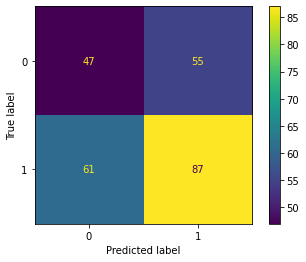

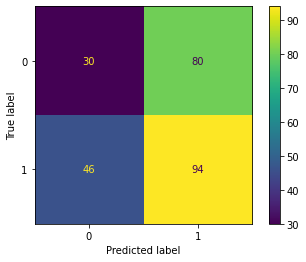

In [56]:
X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
y=data['Valence'].values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
  
# KNN
clf1 = KNeighborsClassifier(n_neighbors=7, leaf_size=3, p=1)
clf1.fit(X_train, y_train)
y_predict = clf1.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
#print(cm)
plot_confusion_matrix(clf1, X_test, y_test) 
print("Classification report of valence")
print(classification_report(y_test, y_predict))
print("Accuracy score of Valence ")
print(accuracy_score(y_test, y_predict)*100)



###############################################################################

X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
y=data['Arousal'].values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
  
# KNN
clf2 = KNeighborsClassifier(n_neighbors=7)
clf2.fit(X_train, y_train)
y_predict = clf2.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
#print(cm)
plot_confusion_matrix(clf2, X_test, y_test) 
print("Accuracy score of Arousal ")
print(accuracy_score(y_test, y_predict)*100)

test = data.sample(1)
copy = test
predict_x = copy.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values

predict_y_arousal = test['Arousal'].values
predict_y_valence = test['Valence'].values
print(test)
# print(copy)
print(predict_x)
print(predict_y_arousal)
print(predict_y_valence)
Arousalpredict = clf2.predict(predict_x)
Valencepredict = clf1.predict(predict_x)
print(Arousalpredict)
print(Valencepredict)

In [57]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [63]:
outF = open("/content/gdrive/MyDrive/Signal_prediction/prediction.txt", "w")

if ((Arousalpredict == 0 and Valencepredict == 0) or (Arousalpredict == 0 and Valencepredict == 1)):
  outF.write("sad")
  outF.write("\n")

outF.close()

Accuracy score of valence test KNN-PCA
52.400000000000006
Accuracy score of Arousal test KNN-PCA
56.8


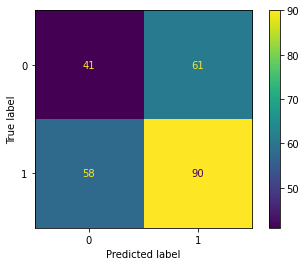

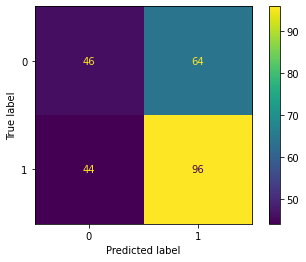

In [ ]:
def knn_classifier_pca():
    X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
    y=data['Valence'].values
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    # PCA to select features
    pca = PCA(n_components=10, svd_solver='full')
    pca.fit(X)
    X = pca.transform(X)
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
    
    # Feature Scaling
    # from sklearn.preprocessing import StandardScaler
    # sc = StandardScaler()
    # X_train = sc.fit_transform(X_train)
    # X_test = sc.transform(X_test)
       	
    # KNN classsifier
    clf = KNeighborsClassifier(n_neighbors=7, leaf_size=3, p=1)
    trained_model=clf.fit(X_train,y_train)
    trained_model.fit(X_train,y_train )
    
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    #print(cm)
    plot_confusion_matrix(clf, X_test, y_test) 
    
    print("Accuracy score of valence test KNN-PCA")
    
    print(accuracy_score(y_test, y_predict)*100)
    # print("AUC score for Valence")
    # print(roc_auc_score(y_test, y_predict))
    
    
    ########################################################################
    X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
    y=data['Arousal'].values
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
        
    # PCA to select features
    pca = PCA(n_components=10, svd_solver='full')
    pca.fit(X)
    X = pca.transform(X)
        	
    # KNN classsifier
    clf = KNeighborsClassifier(n_neighbors=9)
    trained_model=clf.fit(X_train,y_train)
    trained_model.fit(X_train,y_train )
    
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    #print(cm)
    plot_confusion_matrix(clf, X_test, y_test) 
    
    print("Accuracy score of Arousal test KNN-PCA")
    print(accuracy_score(y_test, y_predict)*100)

knn_classifier_pca()   
    

In [ ]:
def svm_classifier(): 
    X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
    y=data['Valence'].values
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    	
    # SVM Classifier
    clf1 = SVC(kernel = 'rbf', random_state = 42)
    clf1.fit(X_train, y_train)
    y_predict = clf1.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    #print(cm)
    plot_confusion_matrix(clf1, X_test, y_test) 
    
    print("Accuracy score of Valence ")
    print(accuracy_score(y_test, y_predict)*100)
    
    ###############################################################
    
    X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
    y=data['Arousal'].values
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    	
    # SVM Classifier
    clf2 = SVC(kernel = 'rbf', random_state = 42)
    clf2.fit(X_train, y_train)
    y_predict = clf2.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    #print(cm)
    plot_confusion_matrix(clf2, X_test, y_test) 
    print("Accuracy score of Arousal ")
    print(accuracy_score(y_test, y_predict)*100)
    test = data.sample(1)
    copy = test
    predict_x = copy.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values

    predict_y_arousal = test['Arousal'].values
    predict_y_valence = test['Valence'].values
    print(test)
    # print(copy)
    print(predict_x)
    print(predict_y_arousal)
    print(predict_y_valence)
    Arousalpredict = clf2.predict(predict_x)
    Valencepredict = clf1.predict(predict_x)
    print(Arousalpredict)
    print(Valencepredict)

Accuracy score of Valence 
56.39999999999999
Accuracy score of Arousal 
55.60000000000001
               0           1         2  ...  Arousal  Dominance  Likings
1182  299.106693  278.448136  1.074192  ...        0          0        0

[1 rows x 71 columns]
[[ 2.99106693e+02  2.78448136e+02  1.07419176e+00  2.61649747e+05
   9.30932482e-01  6.12469043e+00  1.03686566e+03  6.78571429e-01
   6.95121951e-01  9.29824561e-01  1.90476190e-01  5.00571102e+01
   5.02271659e+01  4.99245831e+01  4.75609756e+01  4.88377220e-01
   5.11622780e-01  2.09027778e+02  2.13944557e+02  5.28905526e-01
   4.71094474e-01  2.02503888e+02  1.91116560e+02  5.07193561e-01
   4.92806439e-01  2.05791687e+02  2.02851932e+02  5.32751718e-01
   1.92789164e+00  7.77044633e+02  5.85113709e+02  1.34569607e+02
   2.27974461e+03  4.43133900e+01  3.17122210e+02 -7.41020191e-01
   1.99317015e+03  9.96585076e+02  5.77703507e+02  1.34569607e+01
   4.50544102e+01  3.87659596e+04  1.39000000e+02  4.02500000e+03
   1.49000000e+

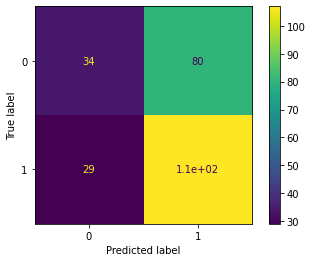

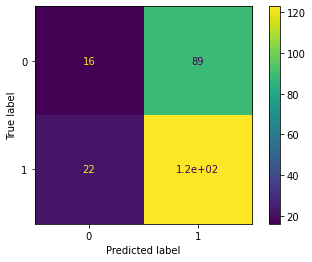

In [ ]:
svm_classifier()

Applying PCA to select features 

Split the data into training/testing sets 

Feature Scaling 

Applying SVM classifier 

Accuracy score of Valence SVM-PCA
59.599999999999994
Applying PCA to select features 

Split the data into training/testing sets 

Feature Scaling 

Applying SVM classifier 

56.00000000000001


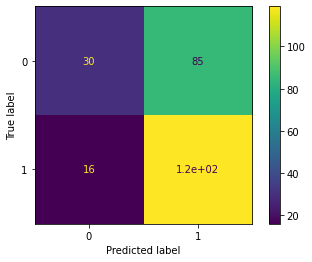

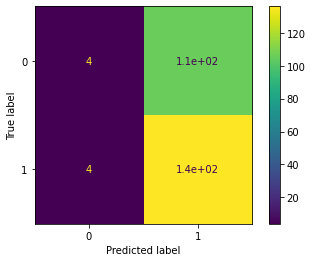

In [ ]:
def svm_classifier_pca():
    X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
    y=data['Valence'].values
    print("Applying PCA to select features \n")
    
    # PCA to select features
    pca = PCA(n_components=10, svd_solver='full')
    pca.fit(X)
    X = pca.transform(X)
    #explained_variance=pca.explained_variance_ratio_
    
   
    print("Split the data into training/testing sets \n")

    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test_0 = train_test_split(X, y, test_size=0.2, random_state=4)
     
    
    print("Feature Scaling \n")
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    
    
    print("Applying SVM classifier \n")
    # SVM Classifier
    clf = SVC()
    clf.fit(X_train, y_train)
    y_predict_0 = clf.predict(X_test)
    cm = confusion_matrix(y_test_0, y_predict_0)
    #print(cm)
    plot_confusion_matrix(clf, X_test, y_test_0) 
    print("Accuracy score of Valence SVM-PCA")
    print(accuracy_score(y_test_0, y_predict_0)*100)
    
    #######################################################################
    
    X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
    y=data['Arousal'].values
    
    print("Applying PCA to select features \n")
    
    # PCA to select features
    pca = PCA(n_components=10, svd_solver='full')
    pca.fit(X)
    X = pca.transform(X)
    #explained_variance=pca.explained_variance_ratio_
    
   
    print("Split the data into training/testing sets \n")
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test_0 = train_test_split(X, y, test_size=0.2, random_state=4)
     
    
    print("Feature Scaling \n")
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    
    print("Applying SVM classifier \n")
    # SVM Classifier
    clf = SVC()
    clf.fit(X_train, y_train)
    y_predict_0 = clf.predict(X_test)
    cm = confusion_matrix(y_test_0,y_predict_0)
    #print(cm)
    plot_confusion_matrix(clf, X_test, y_test_0) 
    print(accuracy_score(y_test_0, y_predict_0)*100)
    
svm_classifier_pca()

Accuracy score of Valence 
54.400000000000006
Accuracy score of Arousal 
51.6


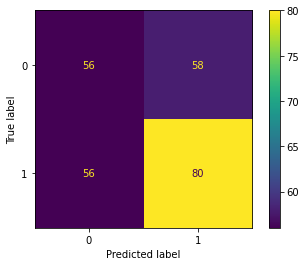

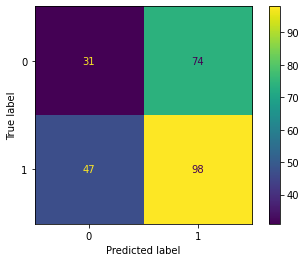

In [ ]:
def adaBoost_classifier(): 
    X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
    y=data['Valence'].values
    # PCA to select features
    # pca = PCA(n_components=10, svd_solver='full')
    # pca.fit(X)
    # X = pca.transform(X)
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    	
    # SVM Classifier
    
    clf = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=0)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    #print(cm)
    plot_confusion_matrix(clf, X_test, y_test) 
    
    print("Accuracy score of Valence ")
    print(accuracy_score(y_test, y_predict)*100)
    
    ###############################################################
    
    X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
    y=data['Arousal'].values
    # PCA to select features
    pca = PCA(n_components=10, svd_solver='full')
    pca.fit(X)
    X = pca.transform(X)
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    	
    # SVM Classifier
    clf = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=0)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    #print(cm)
    plot_confusion_matrix(clf, X_test, y_test) 
    print("Accuracy score of Arousal ")
    print(accuracy_score(y_test, y_predict)*100)

adaBoost_classifier()

In [ ]:
from xgboost import XGBClassifier
import time
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
y1=data['Arousal'].values
y2=data['Valence'].values
#PCA to select features
# pca = PCA(n_components=10, svd_solver='full')
# pca.fit(X)
# X = pca.transform(X)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
xgb1 = XGBClassifier(n_estimators=50, max_depth=5)
# training_start = time.perf_counter()
xgb1.fit(X_train, y_train)
# training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb1.predict(X_test)
prediction_end = time.perf_counter()
#acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
#xgb_train_time = training_end-training_start
#xgb_prediction_time = prediction_end-prediction_start
print(accuracy_score(y_test, preds)*100)
#print("Time consumed for training: %4.3f" % (xgb_train_time))
#print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

58.4


In [ ]:
y=data['Valence'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
xgb2 = XGBClassifier(n_estimators=50, max_depth=5)
# training_start = time.perf_counter()
xgb2.fit(X_train, y_train)
# training_end = time.perf_counter()
#prediction_start = time.perf_counter()
preds = xgb2.predict(X_test)
#prediction_end = time.perf_counter()
#acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
#xgb_train_time = training_end-training_start
#xgb_prediction_time = prediction_end-prediction_start
print(accuracy_score(y_test, preds)*100)
# print("Time consumed for training: %4.3f" % (xgb_train_time))
# print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

60.8


In [ ]:
test = data.sample(1)
copy = test
predict_x = copy.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values

predict_y_arousal = test['Arousal'].values
predict_y_valence = test['Valence'].values
print(test)
# print(copy)
print(predict_x)
print(predict_y_arousal)
print(predict_y_valence)
Arousalpredict = clf2.predict(predict_x)
Valencepredict = clf1.predict(predict_x)
print(Arousalpredict)
print(Valencepredict)

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
X=data.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values
y=data['Arousal'].values
scaler_gnb = MaxAbsScaler()
sdss = scaler_gnb.fit_transform(X)
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(X, y, test_size=0.2, random_state=123)

gnb = GaussianNB()
training_start = time.perf_counter()
gnb.fit(X_train_gnb, y_train_gnb)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = gnb.predict(X_test_gnb)
prediction_end = time.perf_counter()
#acc_gnb = (preds == y_test_gnb).sum().astype(float) / len(preds)*100
gnb_train_time = training_end-training_start
gnb_prediction_time = prediction_end-prediction_start
#print("Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: %3.2f" % (acc_gnb))
print(accuracy_score(y_test, preds)*100)
print("Time consumed for training: %4.3f seconds" % (gnb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (gnb_prediction_time))

56.00000000000001
Time consumed for training: 0.002 seconds
Time consumed for prediction: 0.00075 seconds


In [ ]:
test = data.sample(1)
copy = test
predict_x = copy.drop(['Valence','Arousal','Dominance','Likings'],axis=1).values

predict_y_arousal = test['Arousal'].values
predict_y_valence = test['Valence'].values

In [ ]:
print(test)
# print(copy)
print(predict_x)
print(predict_y_arousal)
print(predict_y_valence)

             0           1         2  ...  Arousal  Dominance  Likings
676  34.410333  135.712984  0.253552  ...        1          1        0

[1 rows x 71 columns]
[[3.44103326e+01 1.35712984e+02 2.53552251e-01 1.46710144e+04
  3.94396025e+00 4.87343025e+00 2.14098646e+03 5.58823529e-01
  5.57377049e-01 8.82352941e-01 1.17647059e-01 4.67836257e+01
  4.70369596e+01 4.65297424e+01 5.57377049e+01 5.32710280e-01
  4.67289720e-01 2.51504705e+01 2.35555738e+01 4.39726385e-01
  5.60273615e-01 8.99938149e+01 1.01583105e+02 4.45357995e-01
  5.54642005e-01 6.60735684e+01 7.37359897e+01 5.53096917e-01
  1.00552187e+00 8.00000000e+00 2.00000000e+00 0.00000000e+00
  3.08622477e+01 5.00000000e-01 1.00000000e+00 3.00000000e-01
  2.30937073e+01 1.15468537e+01 5.00000000e+00 0.00000000e+00
  2.00000000e-01 2.06958680e+04 2.17000000e+02 4.02400000e+03
  4.17900000e+03 6.04062367e+06 2.27082598e+01 1.72823068e+01
  1.43748377e+01 3.39903847e-01 6.59630517e+00 5.60494451e+00
  2.73694223e+01 1.83119407e+

In [ ]:
Arousalpredict = xgb1.predict(predict_x)
Valencepredict = xgb2.predict(predict_x)

In [ ]:
Arousalpredict

array([1])

In [ ]:
Valencepredict

array([1])